In [1847]:
import pandas as pd
import numpy as np
import seaborn as sns
# from backtest import executer
import matplotlib.pyplot as plt
import plotly.express as px
import math
import ast

In [1848]:
sns.set(rc={'figure.figsize':(15,8)})

In [1849]:
portfolio = pd.read_excel('PORTFOLIO.xlsx')

df = pd.read_csv('result_std1.csv')
df['date'] = pd.to_datetime(df.date)

df['stock1'] = [pair.split("'")[1] for pair in df.pair]

In [1850]:
df = df.merge(portfolio.drop_duplicates('ticker'), left_on='stock1', right_on='ticker',how='left')
df.drop(columns=['stock1', 'ticker'], inplace=True)
df['pair'] = df.pair.apply(ast.literal_eval)
df['sorted_pair'] = df.pair.apply(sorted).apply(tuple)

In [1851]:
df.drop_duplicates(subset=['date', 'sorted_pair'], keep='first',inplace=True)

In [1852]:
df.loc[(df.duplicated(subset=['date', 'sorted_pair'], keep='first'))].sort_values(by=['date', 'sorted_pair'])

,date,pair,status,price_fst_stock,price_scnd_stock,beta_open,beta_close,last_residual,std_residual,std_open_residual,...,open_price_scnd_stock,open_date,close_limit,stop_limit,halflife,days_open,data_ini,data_fin,setor,sorted_pair


In [2208]:
df[['std_open_residual', 'residual_open', 'status']].sort_values(by='residual_open')

,std_open_residual,residual_open,status
8769,7.816703,-22.947034,close
8766,7.816703,-22.947034,True
8767,7.816703,-22.947034,True
8768,7.816703,-22.947034,True
8764,8.270183,-19.884641,True
...,...,...,...
4375,5.166326,12.950183,True
4373,5.166326,12.950183,True
4378,5.166326,12.950183,close
4376,5.166326,12.950183,True


In [2211]:
closed.columns

Index(['date', 'pair', 'status', 'price_fst_stock', 'price_scnd_stock',
       'beta_open', 'beta_close', 'last_residual', 'std_residual',
       'std_open_residual', 'residual_open', 'open_price_first_stock',
       'open_price_scnd_stock', 'open_date', 'close_limit', 'stop_limit',
       'halflife', 'days_open', 'data_ini', 'data_fin', 'setor', 'sorted_pair',
       'result', 'cash', 'result_cash_neutral', 'result_beta_neutral',
       'is_profit', 'is_profit_CN', 'is_profit_BN'],
      dtype='object')

In [2379]:
np.log(49.09/44.16)

0.10583594610112133

In [2380]:
np.log(35.57 / 39.25)

-0.09844885826805366

In [2393]:
0.10583594610112133 -0.09844885826805366

0.007387087833067671

In [2411]:
df.loc[df.status=='close', ['date', 'pair', 'price_fst_stock', 'open_price_first_stock', 'price_scnd_stock', 'open_price_scnd_stock', 'result']]

,date,pair,price_fst_stock,open_price_first_stock,price_scnd_stock,open_price_scnd_stock,result
6,2019-07-12,"(AZUL4, GOLL4)",49.09,44.16,39.25,35.57,0.007387
9,2019-08-09,"(AZUL4, GOLL4)",55.47,53.12,40.71,39.64,-0.016654
11,2019-08-13,"(AZUL4, GOLL4)",53.55,54.30,38.24,37.78,0.026011
17,2019-08-21,"(AZUL4, GOLL4)",50.85,50.97,35.31,36.53,-0.031611
24,2019-08-30,"(AZUL4, GOLL4)",47.10,48.94,33.32,33.52,0.032338
...,...,...,...,...,...,...,...
8856,2022-05-23,"(PETZ3, ALPA4)",12.29,11.79,20.76,20.94,0.050167
8869,2022-02-16,"(SOMA3, ALPA4)",13.28,14.39,27.09,29.08,0.009388
8884,2022-04-26,"(VIIA3, CVCB3)",3.04,4.26,13.10,17.05,-0.073874
8893,2022-06-03,"(VIIA3, DXCO3)",3.13,3.03,11.43,11.10,-0.003174


In [2412]:
def result_calculator(row):
    
    if row['residual_open'] < row['std_open_residual']:
        long_result = np.log(row['price_fst_stock'] / row['open_price_first_stock'])
        short_result = np.log(row['open_price_scnd_stock'] / row['price_scnd_stock'])
        result = long_result + short_result
#     long_result = row['open_price_first_stock'] - row['price_fst_stock']
#     short_result = row['price_scnd_stock'] - row['open_price_scnd_stock']

    
    
    elif row['residual_open'] > row['std_open_residual']:
        long_result = np.log(row['open_price_first_stock'] / row['price_fst_stock']) 
        short_result = np.log(row['price_scnd_stock'] / row['open_price_scnd_stock']) 
        result = long_result + short_result
        
    return result

In [2413]:
cond = (df.status.isin(['True', 'close']))

In [2414]:
df.loc[cond, 'result'] = df.loc[cond].apply(lambda row: result_calculator(row), axis=1)

In [2415]:
# Cash Neutral

quant2 = df.loc[cond].open_price_first_stock / df.loc[cond].open_price_scnd_stock
quant1 = 1

long_result = df.loc[cond,'price_fst_stock'] - df.loc[cond,'open_price_first_stock']
short_result = df.loc[cond,'open_price_scnd_stock'] - df.loc[cond,'price_scnd_stock']

result = (quant1 * long_result) + (short_result * quant2)

df.loc[cond,'cash'] = (quant1 * df.loc[cond, 'open_price_first_stock']) + (quant2 * df.loc[cond, 'open_price_scnd_stock'])

df.loc[cond, 'result_cash_neutral'] = result
df.loc[(cond) & (df.residual_open > df.std_open_residual), 'result_cash_neutral'] = - result


In [2416]:
# Beta Neutral

quant2 = df.loc[cond].beta_open
quant1 = 1

result = (quant1) * (df.loc[cond, 'price_fst_stock'] - df.loc[cond, 'open_price_first_stock']) + (df.loc[cond, 'open_price_scnd_stock'] - df.loc[cond,'price_scnd_stock']) * (quant2)

df.loc[cond,'cash'] = (quant1 * df.loc[cond, 'open_price_first_stock']) + (quant2 * df.loc[cond, 'open_price_scnd_stock'])

df.loc[cond, 'result_beta_neutral'] = result
df.loc[(cond) & (df.residual_open > df.std_open_residual), 'result_beta_neutral'] = - result

In [2417]:
closed = df.loc[df.status=='close'].copy()

closed['is_profit'] = closed['result'] > 0
closed['is_profit_CN'] = closed['result_cash_neutral'] > 0
closed['is_profit_BN'] = closed['result_beta_neutral'] > 0


In [2418]:
result = closed[['result', 'result_cash_neutral', 'result_beta_neutral']].sum()
accuracy = closed[['is_profit', 'is_profit_CN', 'is_profit_BN']].mean()

In [2419]:
result_table = {'result': result.values,
                'accuracy': accuracy.values,                
               }
pd.DataFrame(result_table, index=['normal', 'cash_neutral', 'beta_neutral'])

,result,accuracy
normal,4.109702,0.511137
cash_neutral,135.488846,0.511137
beta_neutral,128.220265,0.501758


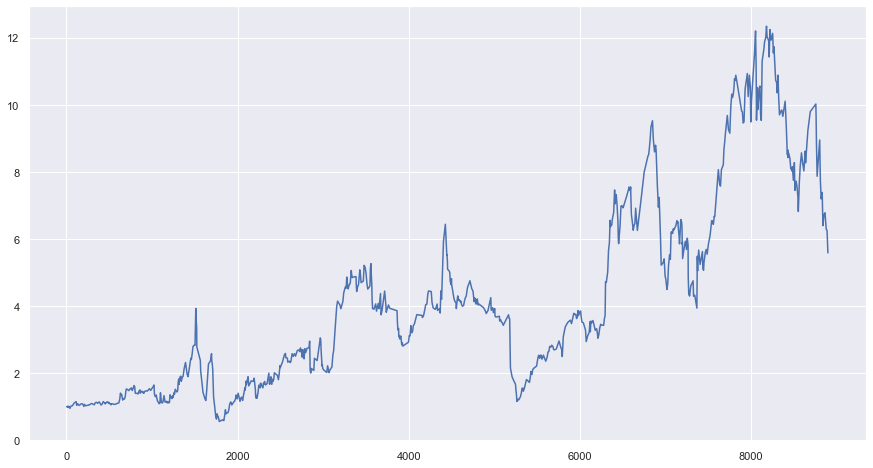

In [2420]:
np.cumprod(1+closed.result).plot()

In [2421]:
closed

,date,pair,status,price_fst_stock,price_scnd_stock,beta_open,beta_close,last_residual,std_residual,std_open_residual,...,data_fin,setor,sorted_pair,result,cash,result_cash_neutral,result_beta_neutral,is_profit,is_profit_CN,is_profit_BN
6,2019-07-12,"(AZUL4, GOLL4)",close,49.09,39.25,0.985577,0.959254,-0.997707,1.312356,1.262734,...,2019-12-31,Aéreas,"(AZUL4, GOLL4)",0.007387,79.216987,0.361296,1.303075,True,True,True
9,2019-08-09,"(AZUL4, GOLL4)",close,55.47,40.71,0.947513,0.952723,3.919139,1.290817,1.258947,...,2019-12-31,Aéreas,"(AZUL4, GOLL4)",-0.016654,90.679407,-0.916135,-1.336161,False,False,False
11,2019-08-13,"(AZUL4, GOLL4)",close,53.55,38.24,0.956020,0.958335,4.216166,1.351507,1.330845,...,2019-12-31,Aéreas,"(AZUL4, GOLL4)",0.026011,90.418435,1.411143,1.189769,True,True,True
17,2019-08-21,"(AZUL4, GOLL4)",close,50.85,35.31,0.959594,0.965595,4.115253,1.430462,1.361101,...,2019-12-31,Aéreas,"(AZUL4, GOLL4)",-0.031611,86.023983,-1.582256,-1.050705,False,False,False
24,2019-08-30,"(AZUL4, GOLL4)",close,47.10,33.32,0.966724,0.972513,2.148847,1.490611,1.449308,...,2019-12-31,Aéreas,"(AZUL4, GOLL4)",0.032338,81.344582,1.547995,1.646655,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,2022-05-23,"(PETZ3, ALPA4)",close,12.29,20.76,0.286549,0.295960,-2.526468,1.618112,1.575374,...,2022-07-01,Varejo,"(ALPA4, PETZ3)",0.050167,17.790331,0.601347,0.551579,True,True,True
8869,2022-02-16,"(SOMA3, ALPA4)",close,13.28,27.09,0.213015,0.196235,1.604310,1.294916,1.245217,...,2022-07-01,Varejo,"(ALPA4, SOMA3)",0.009388,20.584487,0.125265,0.686099,True,True,True
8884,2022-04-26,"(VIIA3, CVCB3)",close,3.04,13.10,0.773178,0.782418,-0.954175,1.405617,1.518323,...,2019-12-31,Varejo,"(CVCB3, VIIA3)",-0.073874,17.442680,-0.233079,1.834052,False,False,True
8893,2022-06-03,"(VIIA3, DXCO3)",close,3.13,11.43,1.777047,1.703955,2.511529,1.555463,1.485031,...,2019-12-31,Varejo,"(DXCO3, VIIA3)",-0.003174,22.755227,-0.009919,0.486426,False,False,True


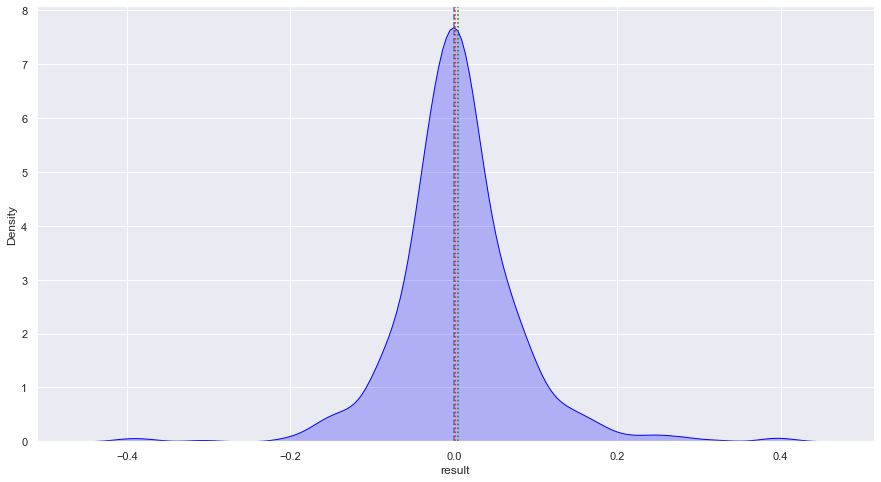

In [2422]:
sns.kdeplot(x=closed.result, color='blue', label='normal', fill=True)
# sns.kdeplot(x=closed.result_cash_neutral, color='red', label='cash neutral', bw_adjust=5, cut=0, fill=True)
# sns.kdeplot(x=closed.result_beta_neutral, color='green', label='beta neutral', bw_adjust=5, cut=0, fill=True)

plt.axvline(x=0, linestyle='dashed')
plt.axvline(x=closed.result.median(), linestyle='dotted', color='red')
plt.axvline(x=closed.result.mean(), linestyle='dotted', color='green')


# plt.legend()
# plt.show()

In [2423]:
# Close by residual
closed_by_residual = closed.loc[abs(df.last_residual) < df.close_limit,['result', 'result_cash_neutral', 'result_beta_neutral']].agg([sum, 'count']).T
closed_by_residual

,sum,count
result,1.854394,27.0
result_cash_neutral,59.558230,27.0
result_beta_neutral,80.075961,27.0


In [2424]:
# stop by stop
closed_by_stop = closed.loc[abs(df.last_residual) > df.stop_limit,['result', 'result_cash_neutral', 'result_beta_neutral']].agg([sum, 'count']).T
closed_by_stop

,sum,count
result,-8.848446,322.0
result_cash_neutral,-210.390263,322.0
result_beta_neutral,-305.667564,322.0


In [2274]:
# stop by halflife
closed_by_halflife = closed.loc[closed.days_open > closed.halflife,['result', 'result_cash_neutral', 'result_beta_neutral']].agg([sum, 'count']).T
closed_by_halflife

,sum,count
result,10.894514,521.0
result_cash_neutral,288.459338,521.0
result_beta_neutral,355.085527,521.0


In [1865]:
# closed = closed.loc[closed.halflife.between(0,21)]

In [2426]:
halfyear_accuracy

,date,variable,accuracy
0,2019-07-31,normal,0.625000
1,2020-01-31,normal,0.511111
2,2020-07-31,normal,0.521053
3,2021-01-31,normal,0.532110
4,2021-07-31,normal,0.436090
5,2022-01-31,normal,0.559633
6,2022-07-31,normal,0.503106
7,2019-07-31,cash neutral,0.625000
8,2020-01-31,cash neutral,0.511111
9,2020-07-31,cash neutral,0.521053


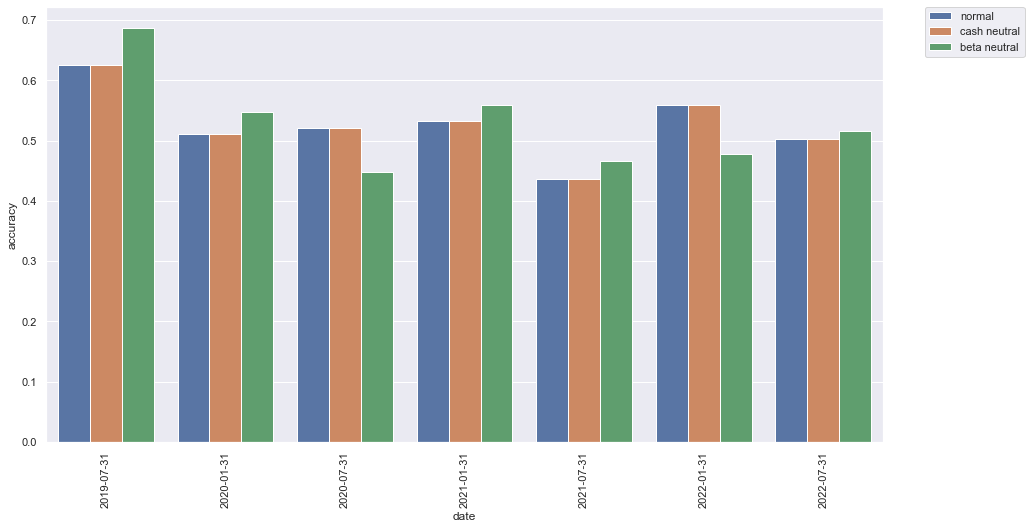

In [2425]:
# Halfyear accuracy
halfyear_accuracy = closed.set_index('date').resample('6M')[['is_profit', 'is_profit_CN', 'is_profit_BN']].mean().reset_index()
halfyear_accuracy.columns = ['date', 'normal', 'cash neutral', 'beta neutral']
halfyear_accuracy['date'] = halfyear_accuracy['date'].dt.date
halfyear_accuracy = halfyear_accuracy.melt(id_vars='date', value_name='accuracy')

sns.barplot(x='date', y='accuracy', hue='variable', data=halfyear_accuracy)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

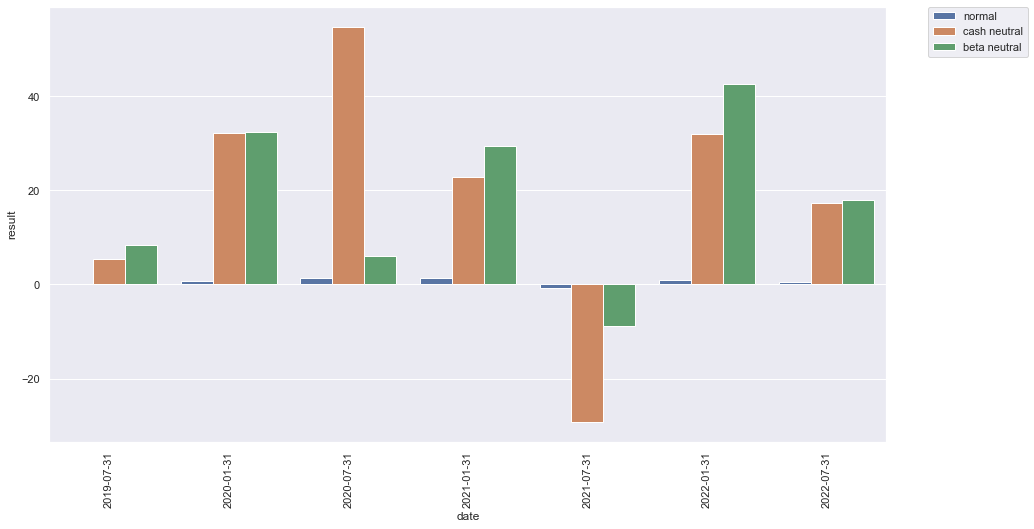

In [2276]:
# Halfyear results
halfyear_results = closed.set_index('date').resample('6M')[['result', 'result_cash_neutral', 'result_beta_neutral']].sum().reset_index()
halfyear_results.columns = ['date', 'normal', 'cash neutral', 'beta neutral']
halfyear_results['date'] = halfyear_results.date.dt.date
halfyear_results = halfyear_results.melt(id_vars='date', value_name='result')

sns.barplot(x='date', y='result', hue='variable', data=halfyear_results)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [2341]:
closed_daily = closed.groupby('date').agg({'result':np.mean, 'result_cash_neutral':sum,'result_beta_neutral':sum})

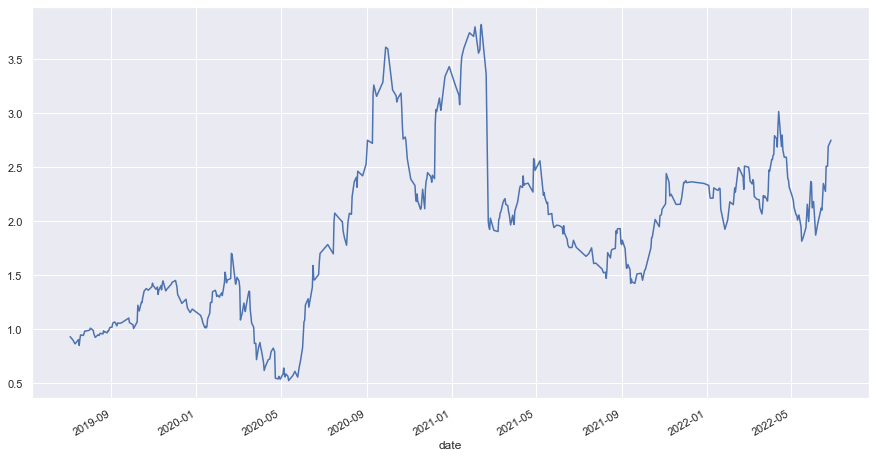

In [2427]:
np.cumprod(1+closed_daily.result).plot()

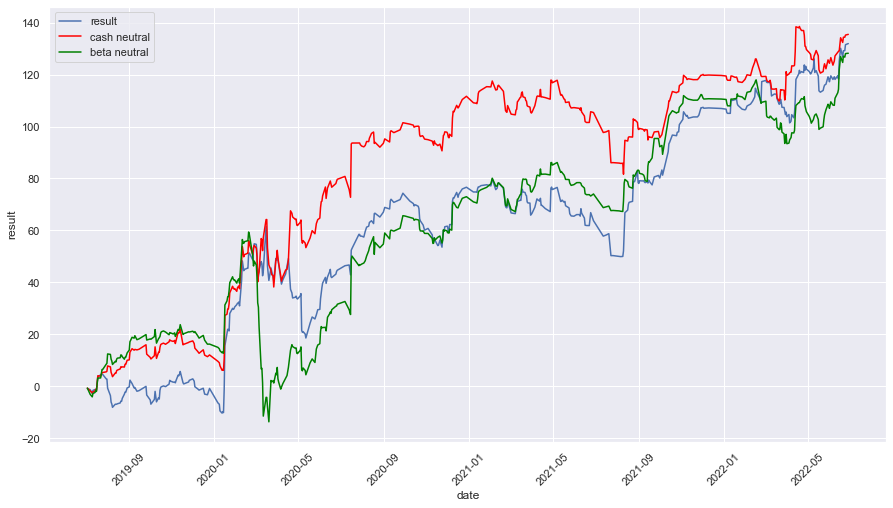

In [1870]:
sns.lineplot(x=closed_daily.index, y=closed_daily.result.cumsum(), label='result')
sns.lineplot(x=closed_daily.index, y=closed_daily.result_cash_neutral.cumsum(),color='red', label='cash neutral')
sns.lineplot(x=closed_daily.index, y=closed_daily.result_beta_neutral.cumsum(),color='green', label='beta neutral')


plt.xticks(rotation=45)
plt.show()

[]

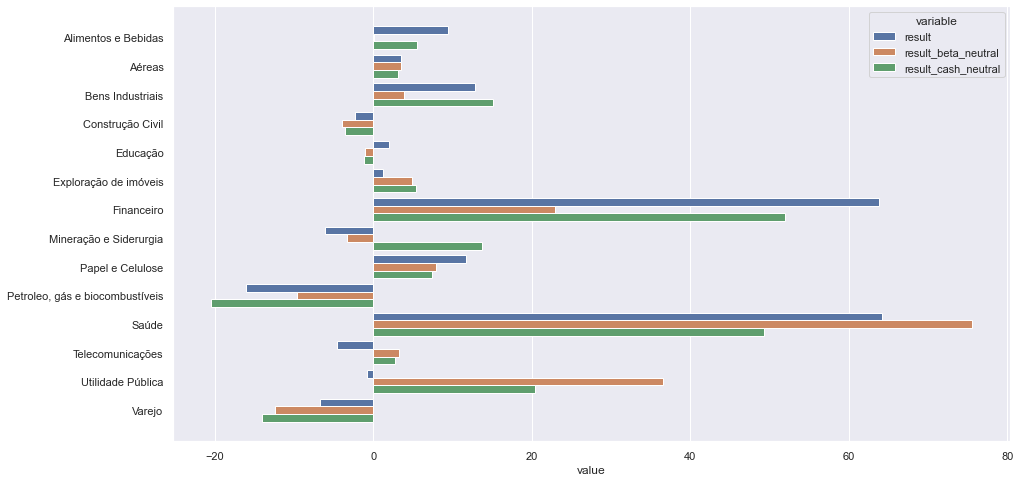

In [1871]:
closed_setor = closed[['setor', 'result', 'result_cash_neutral', 'result_beta_neutral']].melt(id_vars='setor')
closed_setor = closed_setor.groupby(['setor', 'variable'], as_index=False).sum()

plt.figure(figsize=(15,8))

sns.barplot(y='setor', x='value', hue='variable', data=closed_setor, orient='h')
# plt.grid(axis='x')
plt.ylabel(None)
plt.plot()

In [1872]:
closed_setor.pivot(index='setor', columns='variable', values='value')

variable,result,result_beta_neutral,result_cash_neutral
setor,,,
Alimentos e Bebidas,9.47,0.132410,5.536947
Aéreas,3.44,3.525172,3.094137
Bens Industriais,12.83,3.894289,15.153790
Construção Civil,-2.35,-3.968271,-3.543908
Educação,1.98,-1.031729,-1.119002
Exploração de imóveis,1.16,4.911189,5.359375
Financeiro,63.86,22.946025,51.993596
Mineração e Siderurgia,-6.14,-3.383387,13.682216
Papel e Celulose,11.64,7.932651,7.439877


[]

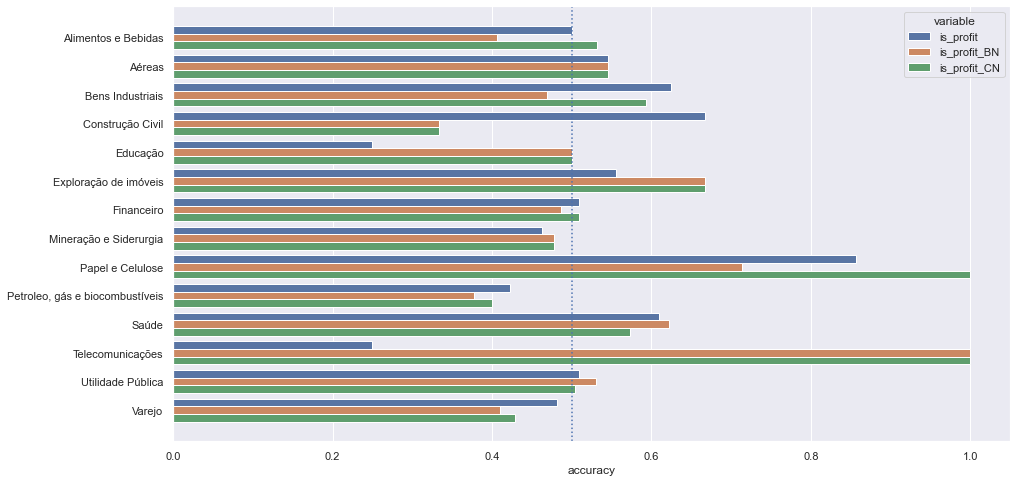

In [1873]:
closed_setor_accuracy = closed[['setor', 'is_profit', 'is_profit_CN', 'is_profit_BN']].melt(id_vars='setor', value_name='accuracy')
closed_setor_accuracy = closed_setor_accuracy.groupby(['setor', 'variable'], as_index=False).mean()
sns.barplot(y='setor', x='accuracy', hue='variable', data=closed_setor_accuracy, orient='h', )
plt.axvline(x=0.5, linestyle='dotted')
plt.ylabel(None)
# plt.grid(axis='x')
plt.plot()

In [1874]:
closed_setor_accuracy.pivot(index='setor', columns='variable', values='accuracy')

variable,is_profit,is_profit_BN,is_profit_CN
setor,,,
Alimentos e Bebidas,0.500000,0.406250,0.531250
Aéreas,0.545455,0.545455,0.545455
Bens Industriais,0.625000,0.468750,0.593750
Construção Civil,0.666667,0.333333,0.333333
Educação,0.250000,0.500000,0.500000
Exploração de imóveis,0.555556,0.666667,0.666667
Financeiro,0.509434,0.486792,0.509434
Mineração e Siderurgia,0.462687,0.477612,0.477612
Papel e Celulose,0.857143,0.714286,1.000000


In [1875]:
pair_closed = closed.groupby('sorted_pair').agg(
    result_sum=('result', 'sum'),
    result_mean=('result', 'mean'),
    result_sum_CN=('result_cash_neutral', 'sum'),
    result_mean_CN=('result_cash_neutral', 'mean'),
    count=('result', 'count'),
    accuracy=('is_profit', 'mean'),
    accuracy_CN=('is_profit_CN', 'mean'),
    sector=('setor', 'last')
    )

pair_closed.loc[pair_closed['count']>3].sort_values(by=['accuracy_CN', 'count'], ascending=False).head(25)

,result_sum,result_mean,result_sum_CN,result_mean_CN,count,accuracy,accuracy_CN,sector
sorted_pair,,,,,,,,
"(KLBN11, SUZB3)",11.64,1.662857,7.439877,1.062840,7,0.857143,1.000000,Papel e Celulose
"(TIMS3, VIVT3)",-4.52,-1.130000,2.701509,0.675377,4,0.250000,1.000000,Telecomunicações
"(BBDC3, BBDC4)",0.83,0.092222,1.356925,0.150769,9,0.666667,0.888889,Financeiro
"(BBAS3, ITSA4)",1.30,0.216667,3.460445,0.576741,6,0.666667,0.833333,Financeiro
"(ELET6, EQTL3)",6.32,0.632000,8.158183,0.815818,10,0.700000,0.800000,Utilidade Pública
"(ITSA4, ITUB4)",1.20,0.240000,1.274313,0.254863,5,0.600000,0.800000,Financeiro
"(BRAP4, GGBR4)",6.49,0.721111,5.180892,0.575655,9,0.777778,0.777778,Mineração e Siderurgia
"(CCRO3, RAIL3)",7.35,0.612500,12.082839,1.006903,12,0.750000,0.750000,Bens Industriais
"(ABEV3, BRFS3)",15.57,1.946250,10.701986,1.337748,8,0.750000,0.750000,Alimentos e Bebidas


In [1876]:
# pair_closed.to_excel('pares_parcial.xlsx')

In [1881]:
returns = np.log(closed['result']/ closed['result'].shift())

c:\users\willi\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

c:\users\willi\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log



In [1989]:
returns.sort_values().tail(40)

7837    125.55
8185    125.64
8239    125.65
8257    125.68
7811    125.71
7835    125.72
7818    125.72
7961    125.75
7971    125.75
8669    125.75
8232    125.83
7826    126.09
8225    126.10
7985    126.15
8162    126.29
8869    126.86
8001    126.90
8845    127.06
8124    127.30
8697    127.38
8856    127.74
8765    127.83
8116    127.92
7996    128.09
8009    128.16
8762    128.35
8154    129.03
8068    129.19
8884    129.59
8893    129.82
8083    130.04
8134    130.16
8091    130.19
8064    130.59
8108    130.66
8046    130.71
8099    130.72
8078    131.60
8903    131.94
8057    132.03
Name: result, dtype: float64

In [2198]:
closed_daily['result'].reset_index().cumsum().min()

date      1678-12-02 02:07:11.452241920
result                           -10.38
dtype: object

In [2199]:
returns = 1+closed_daily['result'].cumsum()
# sns.lineplot(x=returns.index, y=returns.values)
# sns.lineplot(x=ibov.index, y=ibov.close)

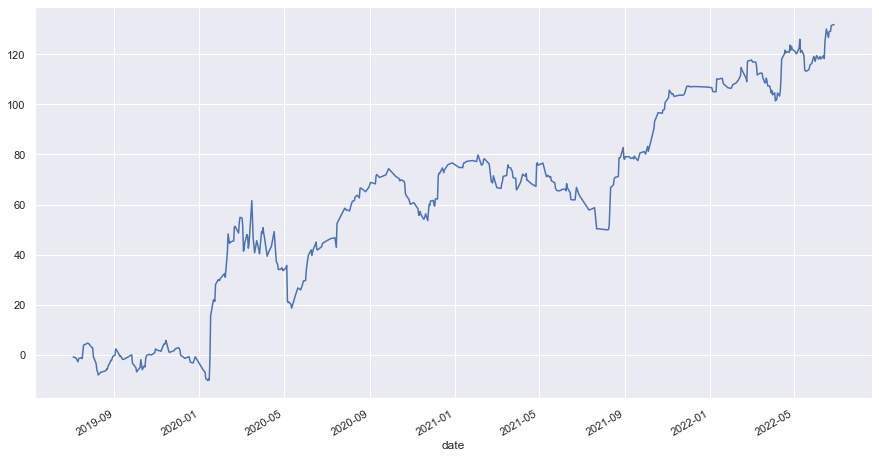

In [2200]:
closed_daily['result'].cumsum().plot()

In [2201]:
log_returns = np.log(returns/returns.shift())

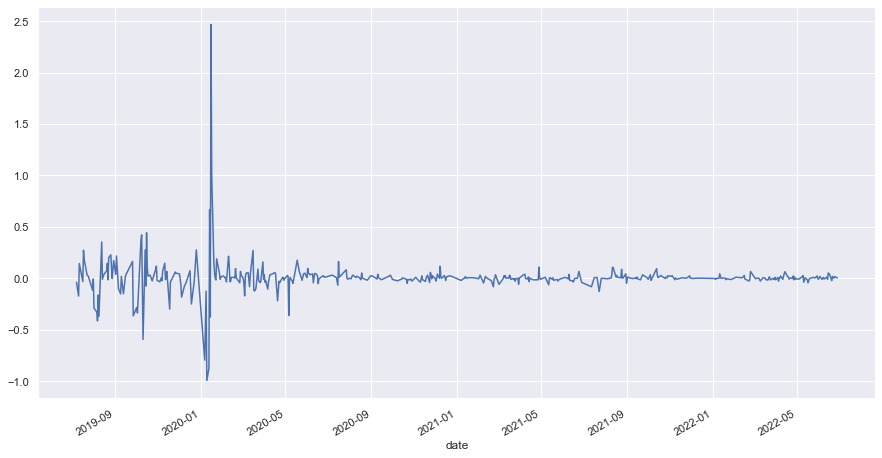

In [2202]:
log_returns.plot()

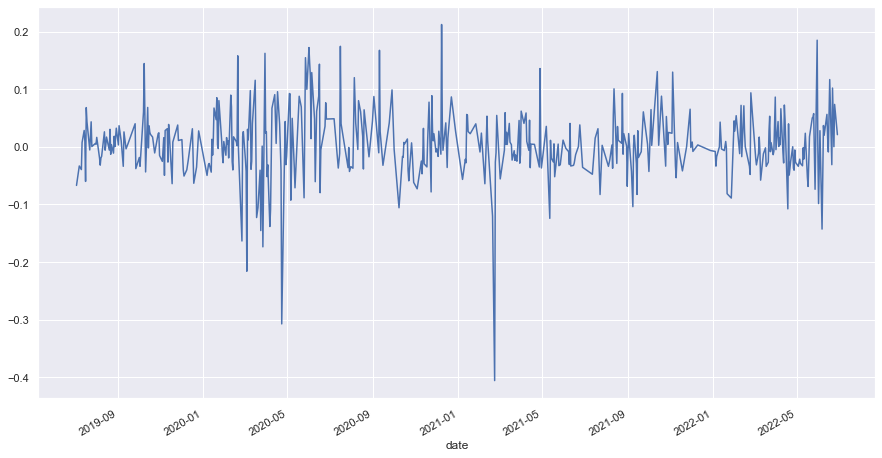

In [2343]:
closed_daily.result.plot()

In [2344]:
anualized_vol = closed_daily.result.std() * math.sqrt(252) * 100
anualized_vol

94.80896361041022

In [2345]:
ibov = pd.read_csv('IBOV.csv', usecols=[0, 4], index_col=0)
ibov.index = pd.to_datetime(ibov.index)
ibov = ibov.loc[closed.date.min():closed.date.max()]

In [2346]:
ibov_log_return = np.log(ibov/ibov.shift())

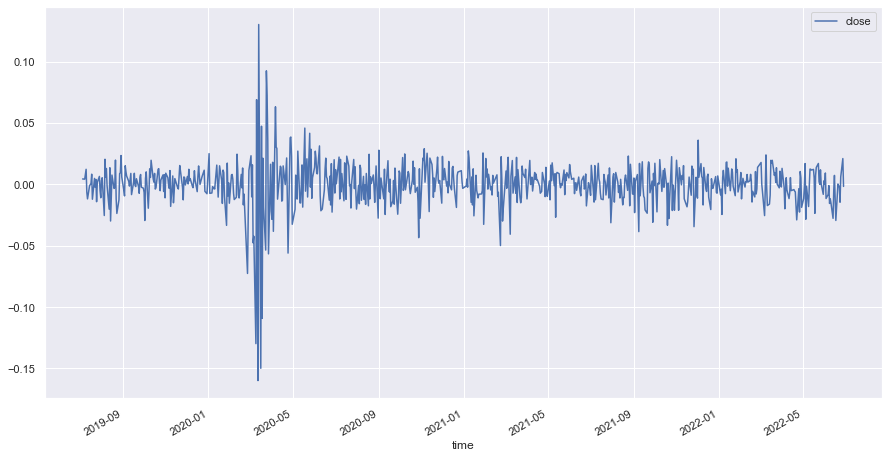

In [2347]:
ibov_log_return.plot()

In [2348]:
anualized_vol_ibov = ibov_log_return.std() * math.sqrt(252) * 100
anualized_vol_ibov

close    30.657384
dtype: float64

In [2349]:
a = [1,2,3,4,5,6,7,25,9, 10]

In [2350]:
np.mean(a)

7.2

In [2351]:
np.multiply(a, 0.1).sum()

7.200000000000001

In [2352]:
pesos = np.divide(1, len(a))
pesos

0.1

In [2353]:
cum_coint = np.cumprod(1+closed_daily.result)

In [2354]:
cum_ibov = np.cumprod(1+ibov_log_return)['close']

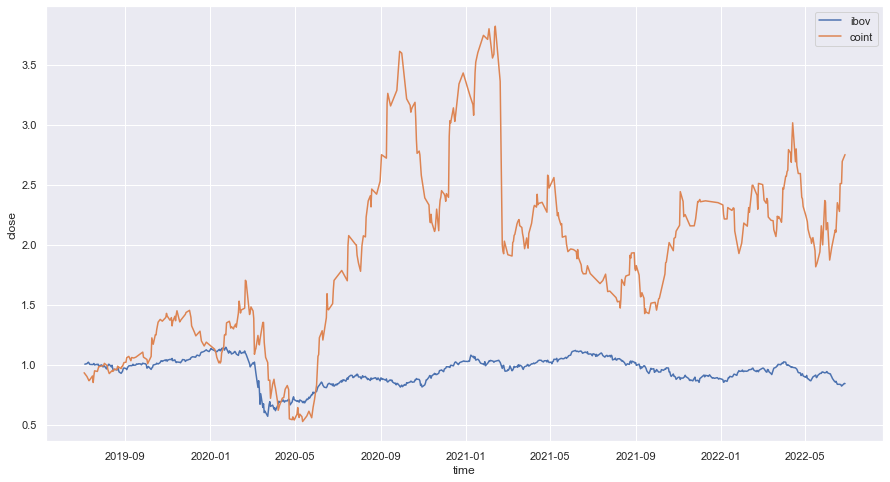

In [2428]:
sns.lineplot(x=cum_ibov.index, y=cum_ibov, label='ibov')
sns.lineplot(x=cum_coint.index, y=cum_coint, label='coint')
plt.legend()
plt.show()

In [1939]:
cpi.iloc[-1]/cpi.iloc[1] -1

close   -0.160927
dtype: float64

In [1933]:
ibov.iloc[-1]/ibov.iloc[1]-1

close   -0.033615
dtype: float64

In [1908]:
log_returns

17     -2.691243
24      3.068053
32     -1.928619
69      0.652510
87      0.547029
          ...   
8856    0.005338
8869   -0.006913
8884    0.021292
8893    0.001773
8903    0.016198
Name: result, Length: 840, dtype: float64

In [2440]:
closed.set_index('date').resample('6M', closed='left').mean()

,price_fst_stock,price_scnd_stock,beta_open,beta_close,last_residual,std_residual,std_open_residual,residual_open,open_price_first_stock,open_price_scnd_stock,...,stop_limit,halflife,days_open,result,cash,result_cash_neutral,result_beta_neutral,is_profit,is_profit_CN,is_profit_BN
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,26.433304,25.417232,1.139117,1.132679,0.234725,1.062904,1.028744,0.327258,26.570804,25.401607,...,3.086231,7.223214,6.919643,0.001794,51.053911,0.107468,0.144769,0.535714,0.535714,0.571429
2020-06-30,23.694206,22.976028,0.996785,1.005174,-1.095233,1.279981,1.255002,-0.699408,24.366121,23.448879,...,3.765005,8.163551,6.682243,0.008733,42.064514,0.316028,0.071708,0.518692,0.518692,0.453271
2020-12-31,21.363717,20.833717,1.635939,1.632371,-0.933941,1.453501,1.418273,-0.920667,21.106372,20.487699,...,4.254818,7.292035,6.654867,0.010518,46.059482,0.282966,0.366518,0.513274,0.513274,0.557522
2021-06-30,22.262074,20.364370,1.047957,1.041607,0.140230,1.022686,1.017366,0.093013,22.107704,20.163852,...,3.052098,8.659259,7.340741,-0.001594,38.517694,-0.046302,0.007712,0.451852,0.451852,0.481481
2021-12-31,22.523571,25.114490,0.377592,0.395370,-0.356923,1.110418,1.133615,-0.751910,22.347857,25.402143,...,3.400845,9.336735,8.693878,0.006634,30.151586,0.145615,0.373081,0.581633,0.581633,0.489796
2022-06-30,22.678343,23.113315,0.858068,0.867849,-0.009585,1.205073,1.182687,0.112838,22.763149,23.197624,...,3.548060,10.038674,7.972376,0.002301,37.307000,0.087446,0.097465,0.491713,0.491713,0.502762


In [2434]:
closed.sort_values(by='date')

,date,pair,status,price_fst_stock,price_scnd_stock,beta_open,beta_close,last_residual,std_residual,std_open_residual,...,data_fin,setor,sorted_pair,result,cash,result_cash_neutral,result_beta_neutral,is_profit,is_profit_CN,is_profit_BN
202,2019-07-04,"(B3SA3, IRBR3)",close,11.54,28.96,0.277444,0.280348,1.686624,0.500138,0.481786,...,2019-12-31,Financeiro,"(B3SA3, IRBR3)",-0.067020,19.015246,-0.748068,-0.720459,False,False,False
769,2019-07-08,"(ELET3, EQTL3)",close,31.50,18.14,3.378256,3.244129,-5.963406,1.895275,1.812249,...,2019-12-31,Utilidade Pública,"(ELET3, EQTL3)",-0.033280,89.450052,-1.065969,-2.411518,False,False,False
984,2019-07-11,"(TAEE11, CMIG4)",close,21.14,8.25,1.447117,1.460365,1.574411,0.541968,0.514480,...,2019-12-31,Utilidade Pública,"(CMIG4, TAEE11)",-0.015962,31.791406,-0.334757,-0.592692,False,False,False
1062,2019-07-11,"(MGLU3, NTCO3)",close,7.18,27.74,0.138176,0.141754,1.062219,0.369986,0.352369,...,2019-12-31,Varejo,"(MGLU3, NTCO3)",-0.063061,10.776243,-0.438797,-0.383233,False,False,False
6,2019-07-12,"(AZUL4, GOLL4)",close,49.09,39.25,0.985577,0.959254,-0.997707,1.312356,1.262734,...,2019-12-31,Aéreas,"(AZUL4, GOLL4)",0.007387,79.216987,0.361296,1.303075,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8762,2022-06-20,"(TAEE11, EGIE3)",close,40.19,41.95,0.422679,1.137017,0.079056,1.522214,1.663984,...,2019-12-31,Utilidade Pública,"(EGIE3, TAEE11)",0.023107,56.672024,0.939487,0.069380,True,True,True
8078,2022-06-21,"(RADL3, HAPV3)",close,18.77,5.72,0.749127,0.686708,-0.064436,0.976290,1.001472,...,2019-12-31,Saúde,"(HAPV3, RADL3)",0.101969,25.727375,2.014940,2.447631,True,True,True
7647,2022-06-23,"(GGBR4, BRAP4)",close,22.27,24.57,0.337469,0.337926,-4.246104,1.290952,1.262734,...,2019-12-31,Mineração e Siderurgia,"(BRAP4, GGBR4)",0.000113,31.454580,0.002527,-0.407023,True,True,False
7227,2022-06-24,"(B3SA3, ITUB4)",close,11.47,23.41,0.663348,0.588280,-1.144417,1.230578,1.301557,...,2019-12-31,Financeiro,"(B3SA3, ITUB4)",0.073575,29.216638,0.813610,1.377672,True,True,True
